## References
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import data_loader
import numpy as np
import pandas


In [2]:
# load data and assign names
trdf, valdf = data_loader.load_train_data("data/adult.data", is_df=True)
## adding columns labels https://chartio.com/resources/tutorials/how-to-rename-columns-in-the-pandas-python-library/
trdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]
valdf.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
,"target"]

# data exploration https://www.kaggle.com/maviator/data-exploration-and-sklearn-models




In [4]:
trdf.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29315.000000,2.931500e+04,29315.000000,29315.000000,29315.000000,29315.000000
mean,38.590756,1.894121e+05,10.071295,1094.195941,87.954801,40.443084
std,13.634218,1.057128e+05,2.576820,7458.664789,404.127059,12.311993
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175685e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368395e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Age : This feature has well distributed values as can be seen from 25, 50 and 75 percentile

fnlwt : Relatively well distributed

education-num : This feature is well distributed 

capital-gain: skewed because till 75 percentile all samples have 0 value. Data is concentrated in top percentile

capital-loss: same skewness as observed in capital-gains

hours-per-week: Atleast 50% of the samples are in range of 40-45 hours per week. So data is tightly packed in this range

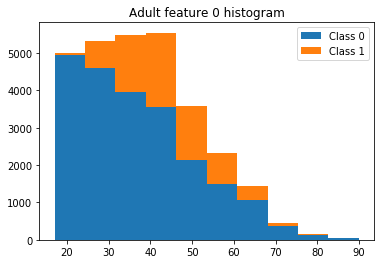

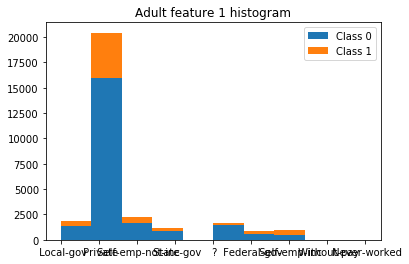

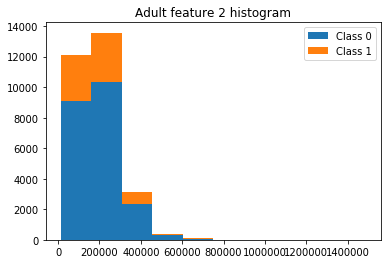

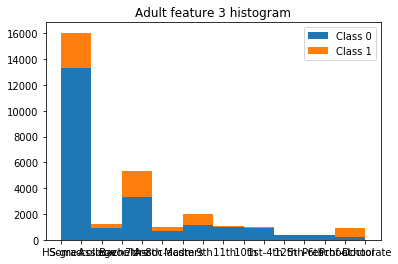

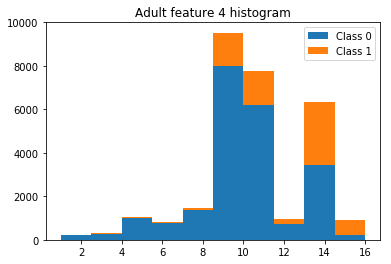

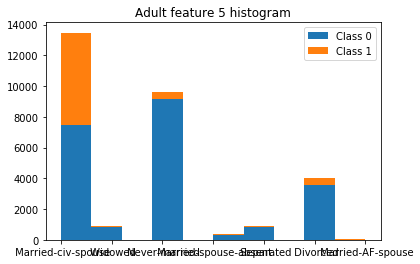

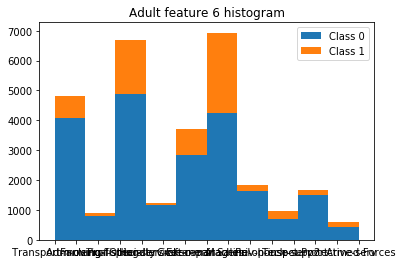

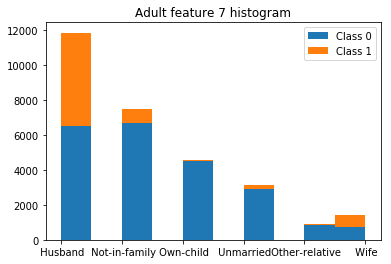

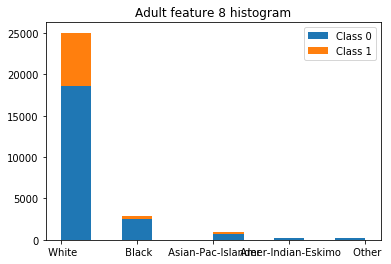

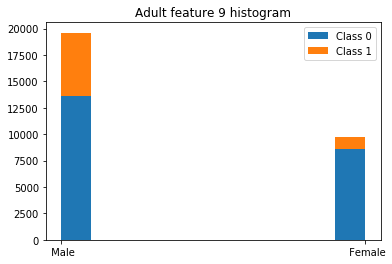

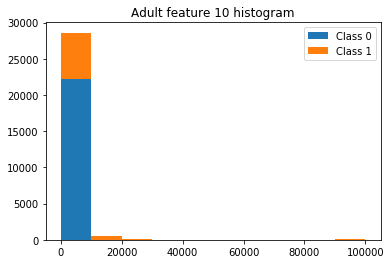

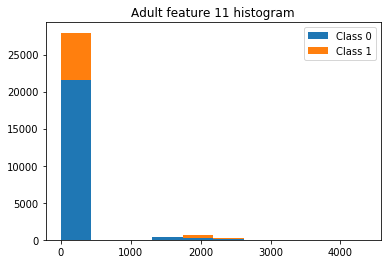

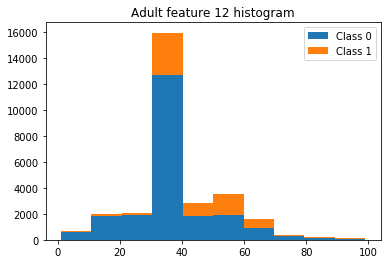

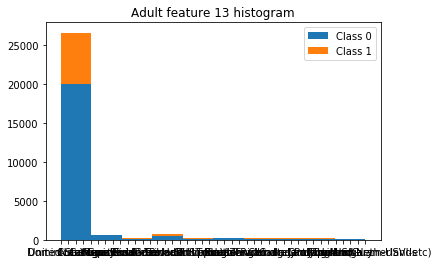

IndexError: index 14 is out of bounds for axis 1 with size 14

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
X = np.asarray(trdf.iloc[:,0:14])
Y = np.asarray(trdf.iloc[:,14])
Y = np.asarray([0 if y == ' <=50K' else 1 for y in Y])
Yi = np.unique(Y)
number_of_features = Y.shape[0]
for fn in range(number_of_features):
    plt.figure("Figure" + str(fn))
    plt.hist([X[Y==c, fn] for c in Yi], histtype = 'barstacked', label=["Class " + str(int(y)) for y in Yi])
#     plt.grid(True)
    plt.legend()
    plt.title("Adult feature {0} histogram".format(fn))
    plt.show()

In [8]:
Y.shape

(29315,)

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
type(Y)

pandas.core.series.Series

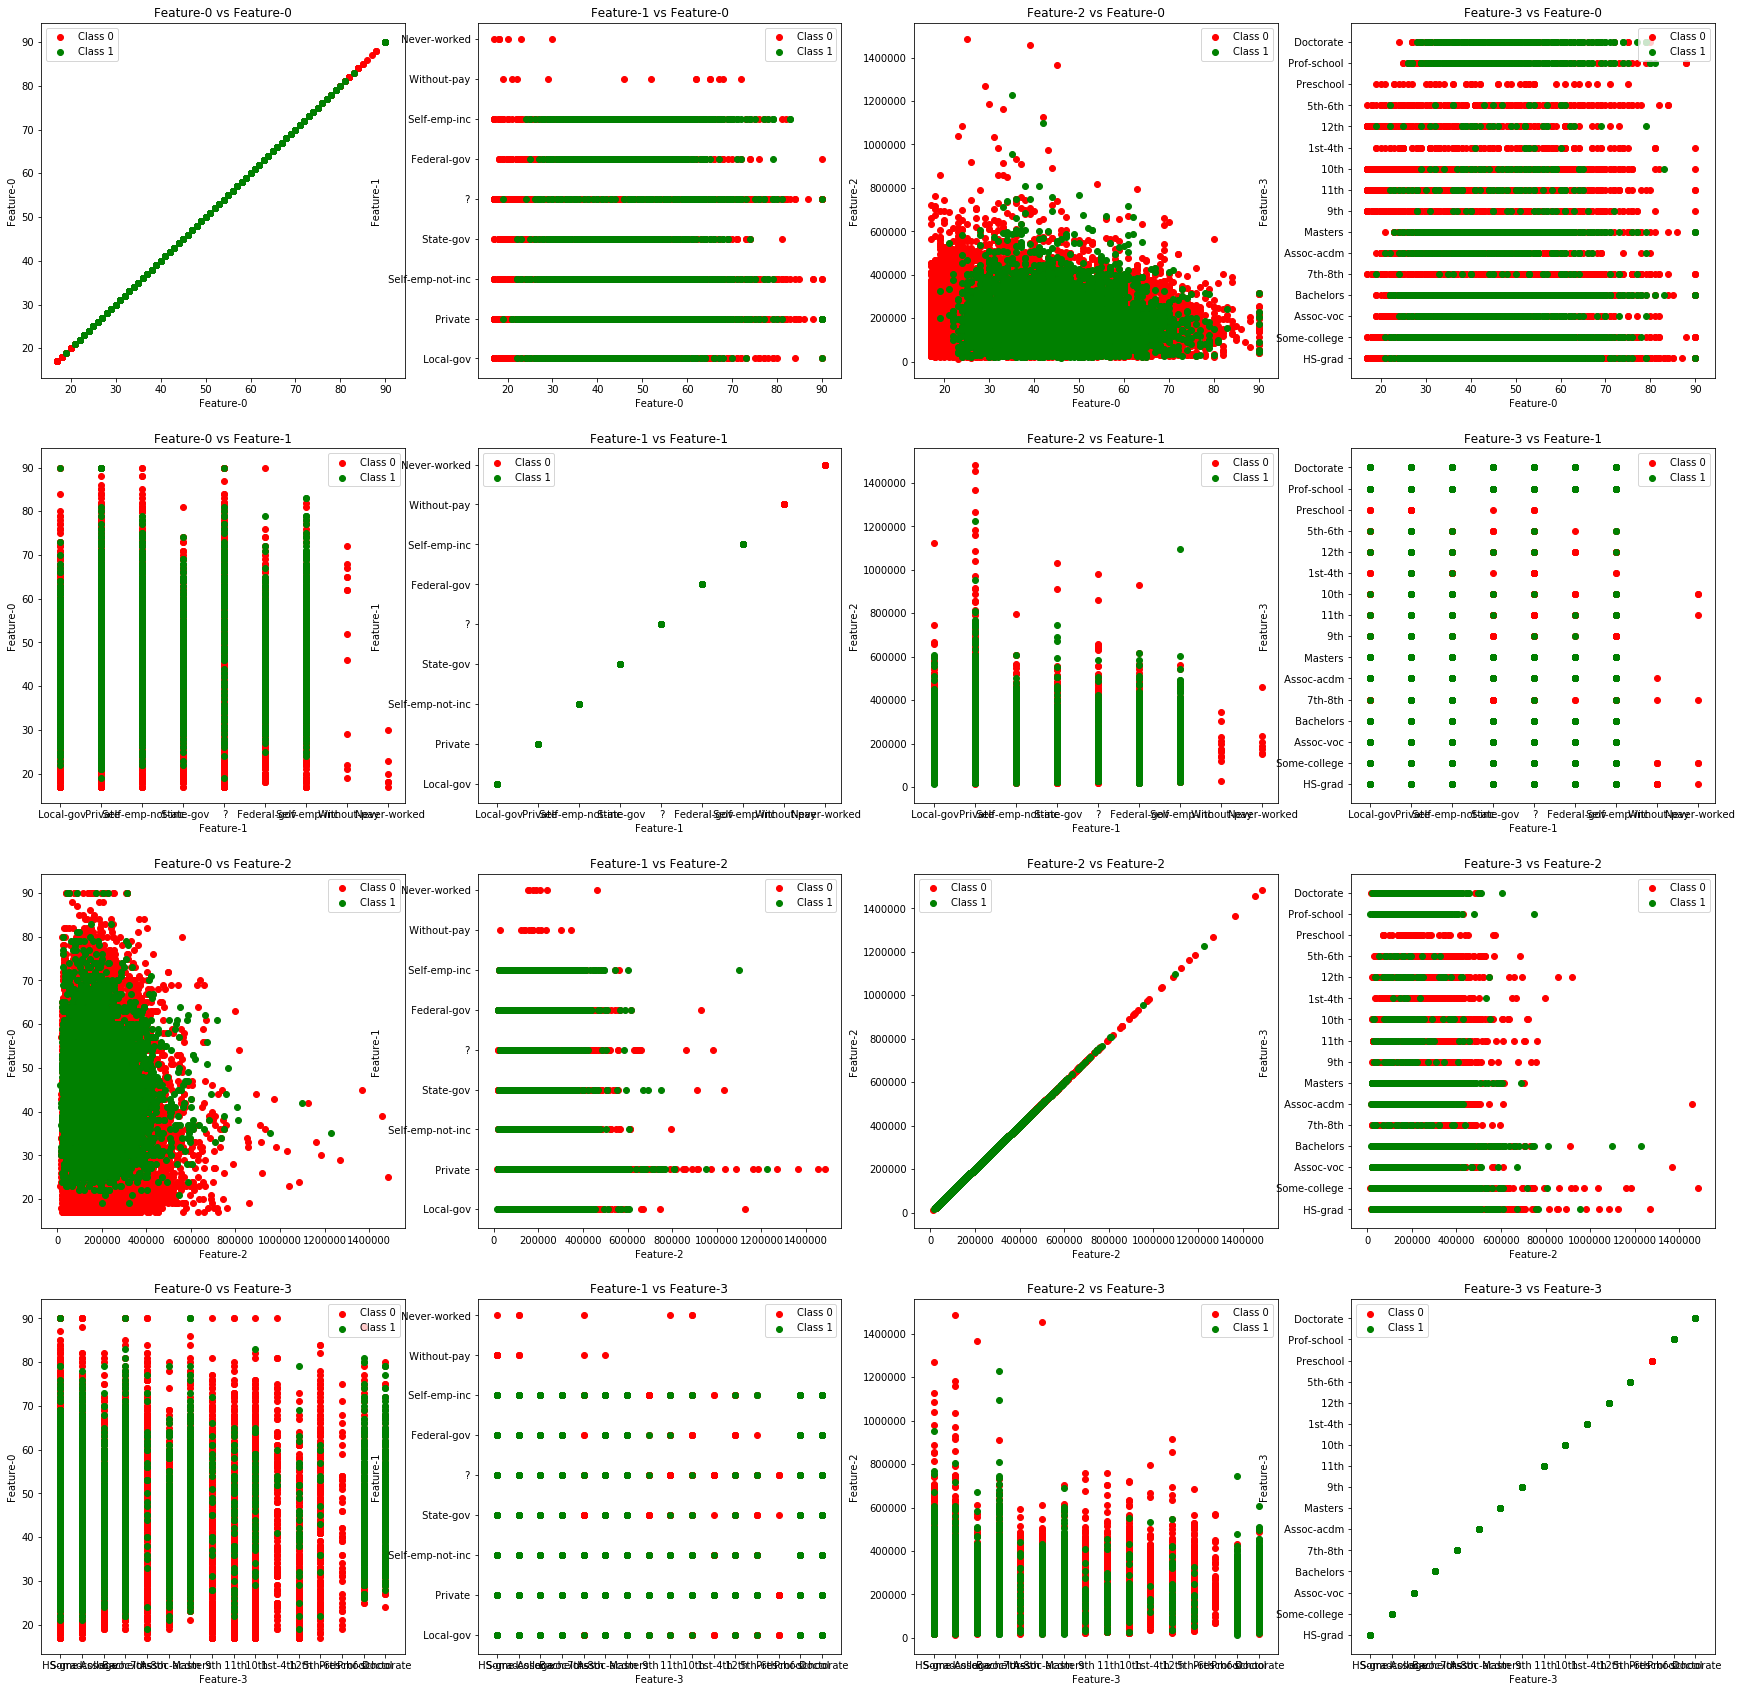

In [25]:
colors = ['r','g','b']
number_of_features=4
ig, ax = plt.subplots(number_of_features, number_of_features, figsize = (30, 30))
for f1 in range(number_of_features):
    for f2 in range(number_of_features):
        plot = ax[f1][f2]
        plot.set(xlabel="Feature-{}".format(f1), ylabel="Feature-{}".format(f2))
#         plot.xlabel("Feature "+ str(f1))
#         plot.ylabel("Feature " + str(f2))
        plot.set_title("Feature-{0} vs Feature-{1}".format(f2,f1))
        for label in Yi:
            plot.scatter(X[Y==label,f1], X[Y==label,f2], color = colors[int(label)], label="Class " + str(int(label)))
        plot.legend()
